라이브러리와 데이터 정의 

In [33]:
from pyomo.environ import *
import matplotlib.pyplot as plt

JOBS={
    'A':{'release':2,'duration':5 ,'due':10},
    'B':{'release':5,'duration':6 ,'due':21},
    'C':{'release':4,'duration':8 ,'due':15},
    'D':{'release':0,'duration':4 ,'due':10},
    'E':{'release':0,'duration':2 ,'due':5},
    'F':{'release':8,'duration':3 ,'due':15},
    'G':{'release':9,'duration':2 ,'due':22}
}   

간트차트 함수 생성 

release와 due 반영해 기한을 그래프에 그리기 

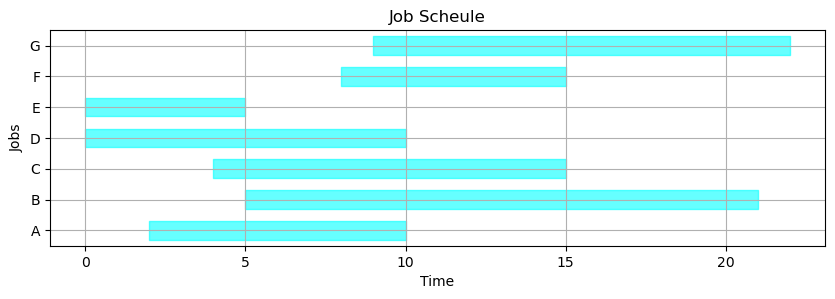

In [34]:
def gantt(JOBS):
    bw=0.3 #bar width 설정 
    plt.figure(figsize=(10,0.4*(len(JOBS.keys())))) #그래프 크기 정하기

    idx=0
    for j in sorted(JOBS.keys()):
        x=JOBS[j]['release']
        y=JOBS[j]['due']
        plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw],color='cyan',alpha=0.6)

        idx+=1
    plt.ylim(-0.5,idx-0.5)
    plt.title('Job Scheule')
    plt.xlabel('Time')
    plt.ylabel('Jobs')
    plt.yticks(range(len(JOBS)),JOBS.keys())
    plt.grid()
    
gantt(JOBS)

Schedule 딕셔너리 만들기

In [ ]:
def schedule(JOBS,order=sorted(JOBS.keys())):
    #작업의 order을 입력받아 dictionary 작업의 일정을 생성하는 함수
    SCHEDULE={}
    start=0
    finish=0
    for job in order:
        #작업의 시작시간과 종료시간을 계산
        #작업의 시작시간은 작업의 release 시간과 이전 작업의 종료시간 중 큰 값
        start=max(JOBS[job]['release'],finish)
        #작업의 종료시간은 시작시간에 작업의 duration을 더한 값
        finish=start+JOBS[job]['duration']
        SCHEDULE[job]={'start':start,'finish':finish}
    return SCHEDULE
SCHEDULE=schedule(JOBS,['E','D','A','F','G','C','B'])
print(SCHEDULE)

{'E': {'start': 0, 'finish': 2}, 'D': {'start': 2, 'finish': 6}, 'A': {'start': 6, 'finish': 11}, 'F': {'start': 11, 'finish': 14}, 'G': {'start': 14, 'finish': 16}, 'C': {'start': 16, 'finish': 24}, 'B': {'start': 24, 'finish': 30}}


pprint 모듈을 사용하여 출력 형식을 예쁘게 하기 

In [36]:
import pprint as pp 
pp.pprint(SCHEDULE)

{'A': {'finish': 11, 'start': 6},
 'B': {'finish': 30, 'start': 24},
 'C': {'finish': 24, 'start': 16},
 'D': {'finish': 6, 'start': 2},
 'E': {'finish': 2, 'start': 0},
 'F': {'finish': 14, 'start': 11},
 'G': {'finish': 16, 'start': 14}}


스케쥴을 원 간트차트 그래프에 덮어 그리기 

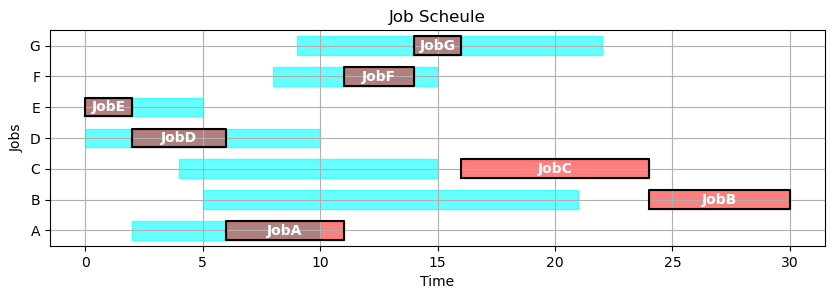

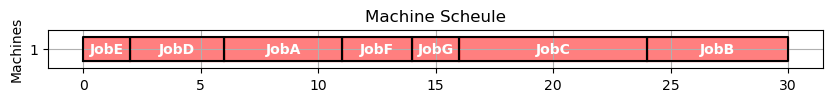

In [37]:
def gantt(JOBS,SCHEDULE={}):
    bw=0.3 #bar width 설정 
    plt.figure(figsize=(10,0.4*(len(JOBS.keys())))) #그래프 크기 정하기

    idx=0
    for j in sorted(JOBS.keys()):
        x=JOBS[j]['release']
        y=JOBS[j]['due']
        plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw],color='cyan',alpha=0.6)

        #스케쥴 그래프를 원 그래프에 덮어 그리기 
        if j in SCHEDULE.keys():
            x=SCHEDULE[j]['start']
            y=SCHEDULE[j]['finish']
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw],color='red',alpha=0.5)
            plt.plot([x,y,y,x,x],[idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            #plt.text(x축 위치,y축 위치,text)
            plt.text((SCHEDULE[j]['start']+SCHEDULE[j]['finish'])/2.0,idx,'Job'+j,color='white',weight='bold',horizontalalignment='center',verticalalignment='center')
        idx+=1
    plt.ylim(-0.5,idx-0.5)
    plt.title('Job Scheule')
    plt.xlabel('Time')
    plt.ylabel('Jobs')
    plt.yticks(range(len(JOBS)),JOBS.keys())
    plt.grid()
    xlim=plt.xlim()

    #스케쥴 그래프만 따로 그리기
    if SCHEDULE:
        for j in SCHEDULE.keys():
            if 'machine' not in SCHEDULE[j].keys():
                #스케쥴에 machine 정보가 없으면 1로 초기화
                SCHEDULE[j]['machine']=1
        #현재는 machine개수가 1개인 케이스를 처리하기 때문에 set으로 중복 제거 시 1개만 남음
        #만약 machine이 여러개인 경우에는 SCHEDULE에 machine 정보를 추가해야 함
        MACHINES=sorted(set([SCHEDULE[j]['machine'] for j in SCHEDULE.keys()]))
        plt.figure(figsize=(10,0.5*len(MACHINES)))
        for j in sorted(SCHEDULE.keys()):
            x=SCHEDULE[j]['start']
            y=SCHEDULE[j]['finish']
            idx=MACHINES.index(SCHEDULE[j]['machine'])
            #plt.fill_between(x축,y축1,y축2,색상,투명도): 채우기
            plt.fill_between([x,y],[idx-bw,idx-bw],[idx+bw,idx+bw],color='red',alpha=0.5)
            #plt.plot(x축,y축,색상) : 테두리 그리기 
            plt.plot([x,y,y,x,x],[idx-bw,idx-bw,idx+bw,idx+bw,idx-bw],color='k')
            plt.text((SCHEDULE[j]['start']+SCHEDULE[j]['finish'])/2.0,idx,'Job'+j,color='white',weight='bold',horizontalalignment='center',verticalalignment='center')
        plt.xlim(xlim)
        plt.ylim(-0.5,len(MACHINES)-0.5)
        plt.title('Machine Scheule')
        plt.yticks(range(len(MACHINES)),MACHINES)
        plt.ylabel('Machines')
        plt.grid()
gantt(JOBS,SCHEDULE)

핵심 성과 지표 계산 함수 작성 (KPI)   
Makespan: 마지막 작업의 완료 시간   
Max Past Due: 납기를 지난 작업의 최대 지연시간   
Sum of Past Due: 납기를 지난 작업의 지연시간의 합   
Number of Past Due: 납기를 지난 작업의 수   
Number of on time: 납기를 지킨 작업의 수   
Fraction on time: 납기를 지킨 작업의 비율   

In [40]:
def kpi(JOBS,SCHEDULE):
    KPI={}
    KPI['Makespan']=max([SCHEDULE[j]['finish'] for j in SCHEDULE.keys()])
    KPI['Max Pastdue']=max(
        max(0,SCHEDULE[job]['finish']-JOBS[job]['due']) for job in SCHEDULE.keys() if SCHEDULE[job]['finish']>JOBS[job]['due']
    )
    KPI['Sum of Pastdue']=sum(
        max(0,SCHEDULE[job]['finish']-JOBS[job]['due']) for job in SCHEDULE.keys() if SCHEDULE[job]['finish']>JOBS[job]['due']
    )
    KPI['Number of Pastdue']=sum(
        SCHEDULE[job]['finish']>JOBS[job]['due'] for job in SCHEDULE.keys()
    )
    KPI['Number of on-time']=sum(
        SCHEDULE[job]['finish']<=JOBS[job]['due'] for job in SCHEDULE.keys()
    )   
    KPI['Fraction on-time']=KPI['Number of on-time']/len(SCHEDULE)
    return KPI
kpi(JOBS,SCHEDULE)

{'Makespan': 30,
 'Max Pastdue': 9,
 'Sum of Pastdue': 19,
 'Number of Pastdue': 3,
 'Number of on-time': 4,
 'Fraction on-time': 0.5714285714285714}

일정 계획 수립 방법   
1. 우선순위 규칙(Dispatching Rules): 작업장에서 작업에 대한 우선순위에 따라 실행